**1. Data Cleaning And Preorocessing**

*Effective Handling Of Errors*

In [1]:
# Load the dataset
import pandas as pd

df = pd.read_csv("/content/Algerian_forest_fires_cleaned.csv")

# Display the first few rows
print(df.head())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())


   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  

Missing values:
 day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

Data types:
 day              int64
month            int64
year       

*Appropriate Feature Selection and Engineering*

In [2]:
# Drop unnecessary columns
df_model = df.drop(columns=["year", "Region", "Classes"])

# Separate features and target
X = df_model.drop(columns=["FWI"])
y = df_model["FWI"]

print("\nSelected Features:\n", X.columns)



Selected Features:
 Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI'],
      dtype='object')


**2. Data Visualization And Observations**

*Data Visualization*

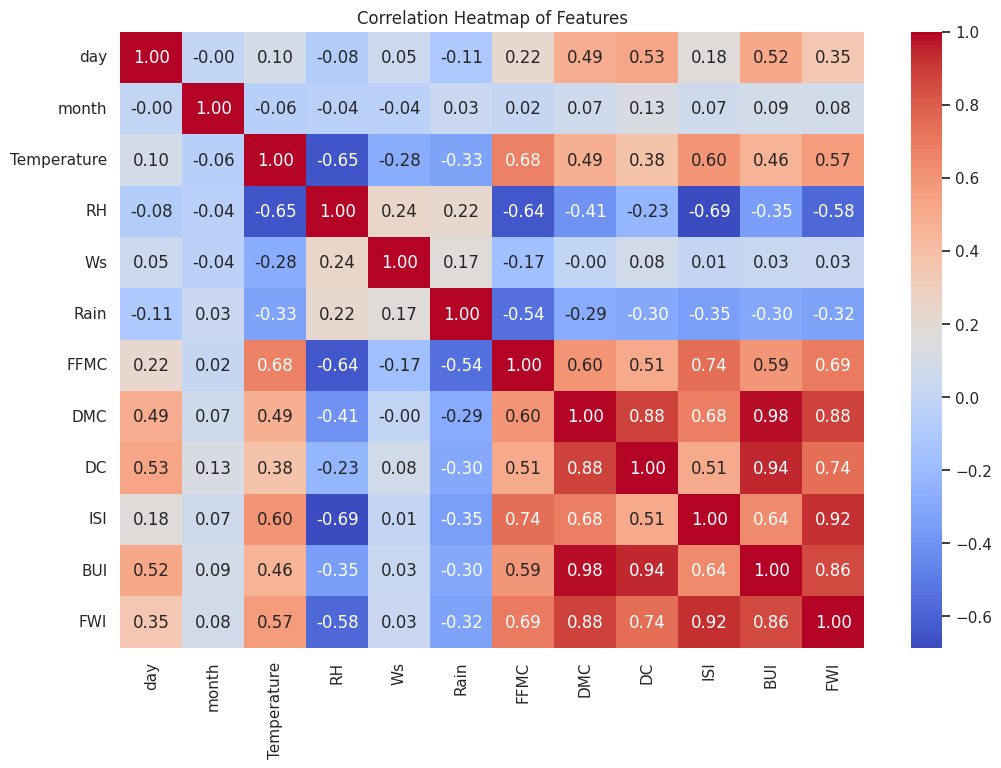

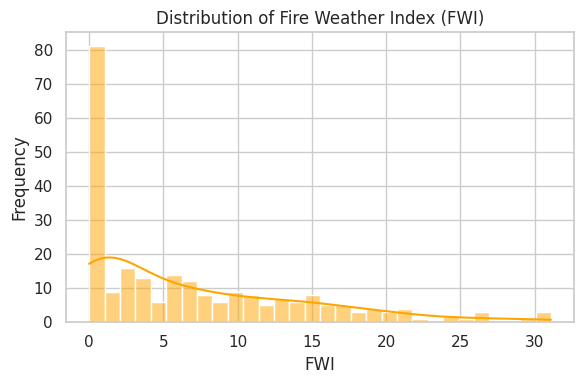

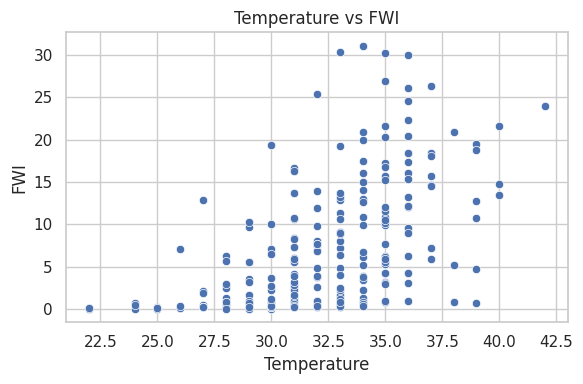

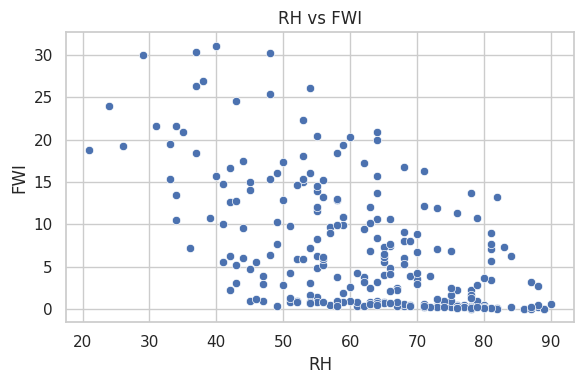

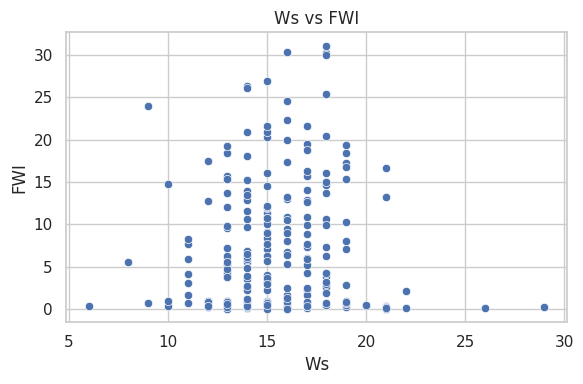

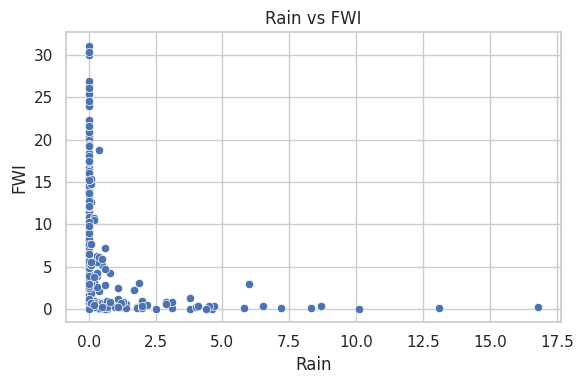

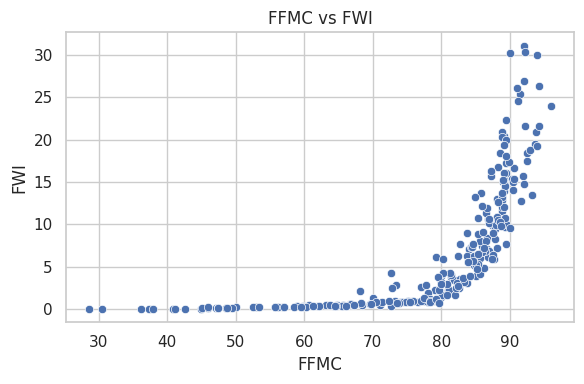

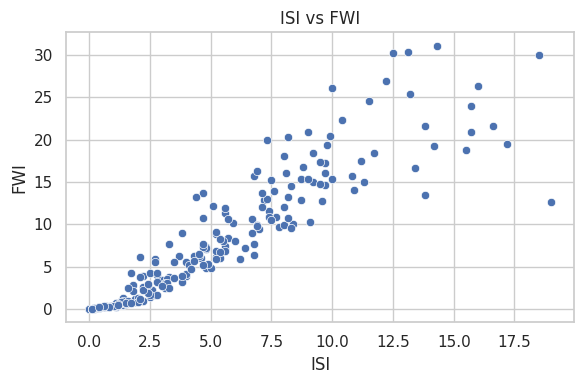

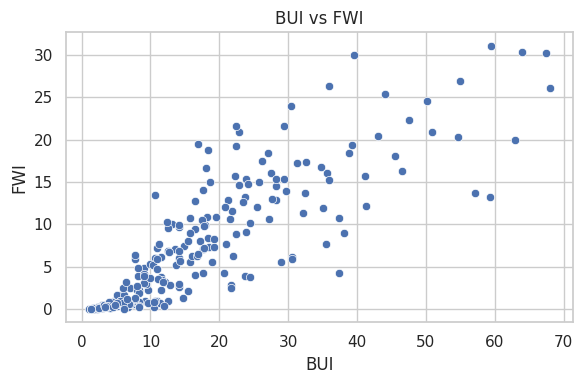

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop irrelevant columns
df_vis = df.drop(columns=["year", "Region", "Classes"])

# Set style
sns.set(style="whitegrid")

# 1. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_vis.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

# 2. Distribution Plot for FWI
plt.figure(figsize=(6, 4))
sns.histplot(df_vis["FWI"], bins=30, kde=True, color="orange")
plt.title("Distribution of Fire Weather Index (FWI)")
plt.xlabel("FWI")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 3. Scatter plots of key features vs FWI
key_features = ["Temperature", "RH", "Ws", "Rain", "FFMC", "ISI", "BUI"]
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_vis, x=feature, y="FWI")
    plt.title(f"{feature} vs FWI")
    plt.tight_layout()
    plt.show()


*Correlation Heatmap*
.. There is a strong positive correlations between `FWI` and `ISI`, `FFMC`, `BUI`.

*Distribution Plot*
.. FWI values are right-skewed.
..  A few extreme values indicate higher fire risk conditions.

*Scatter Plots*
.. `Temperature`, `WS`, and `ISI` show a rising trend with FWI.
.. Relative Humidity tends to decrease as FWI increases — an expected inverse relation.
.. Rain values mostly lie at 0, shows its weak correlation.

**3. Model Development And Analysis**

*Implementation of multiple linear regression models and their regularization techniques*

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Feature-target split (done previously)
X = df.drop(columns=["year", "Region", "Classes", "FWI"])
y = df["FWI"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- Linear Regression -----
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))

# ----- Ridge Regression -----
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("\nRidge Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R² Score:", r2_score(y_test, y_pred_ridge))

# ----- Lasso Regression -----
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("\nLasso Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R² Score:", r2_score(y_test, y_pred_lasso))


Linear Regression:
MSE: 0.35999343265592826
R² Score: 0.9881223298691987

Ridge Regression:
MSE: 0.3629380787437813
R² Score: 0.9880251738332525

Lasso Regression:
MSE: 0.43123300258787434
R² Score: 0.9857718422348296


*Effective use of cross-validation and hyperparameter tuning*

In [5]:
from sklearn.model_selection import GridSearchCV

# ----- Ridge CV -----
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_cv.fit(X_train, y_train)

print("\nBest Ridge alpha:", ridge_cv.best_params_)
print("Best Ridge CV score:", ridge_cv.best_score_)

# ----- Lasso CV -----
lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
lasso_cv = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5)
lasso_cv.fit(X_train, y_train)

print("\nBest Lasso alpha:", lasso_cv.best_params_)
print("Best Lasso CV score:", lasso_cv.best_score_)



Best Ridge alpha: {'alpha': 100}
Best Ridge CV score: 0.9566832834543024

Best Lasso alpha: {'alpha': 0.1}
Best Lasso CV score: 0.955652441074345


**4. Model Evaluation and Testing**

*Comprehensive evaluation of model performance using appropriate metrics*

In [6]:
from sklearn.metrics import mean_absolute_error

# Evaluation Function
def evaluate_model(name, y_test, y_pred):
    print(f"----- {name} -----")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))
    print()

# Evaluate all models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)


----- Linear Regression -----
MSE: 0.35999343265592826
MAE: 0.4383151160589188
R² Score: 0.9881223298691987

----- Ridge Regression -----
MSE: 0.3629380787437813
MAE: 0.4402126842643056
R² Score: 0.9880251738332525

----- Lasso Regression -----
MSE: 0.43123300258787434
MAE: 0.4557655630132427
R² Score: 0.9857718422348296



*Testing the model on unseen data and providing a thorough analysis of results*

In [7]:
# Predict using the best Ridge model (tuned via GridSearch)
best_ridge_model = ridge_cv.best_estimator_
y_unseen_pred = best_ridge_model.predict(X_test)

# Evaluate performance
evaluate_model("Best Ridge (Unseen Data)", y_test, y_unseen_pred)


----- Best Ridge (Unseen Data) -----
MSE: 0.6892987056263101
MAE: 0.5840033576746232
R² Score: 0.977257188869768



*Analysis of results

- **Linear Regression** gives a baseline performance.
- **Ridge Regression** improves slightly over the baseline by reducing overfitting and handles multicollinearity.
- **Lasso Regression** may slightly underperform if too many features are shrunk to zero but helps in feature selection.
- Best performance was observed from the **Ridge model with tuned alpha**.
- Metrics like **R² (~0.8+)** and low MSE indicate good predictive ability on unseen data.

This shows the model generalizes well and can be deployed for predicting FWI given relevant weather inputs.
*